ANALYSIS BY MIKE KIPTOCH

HEALTH CARE ANALYSIS AND DATASET

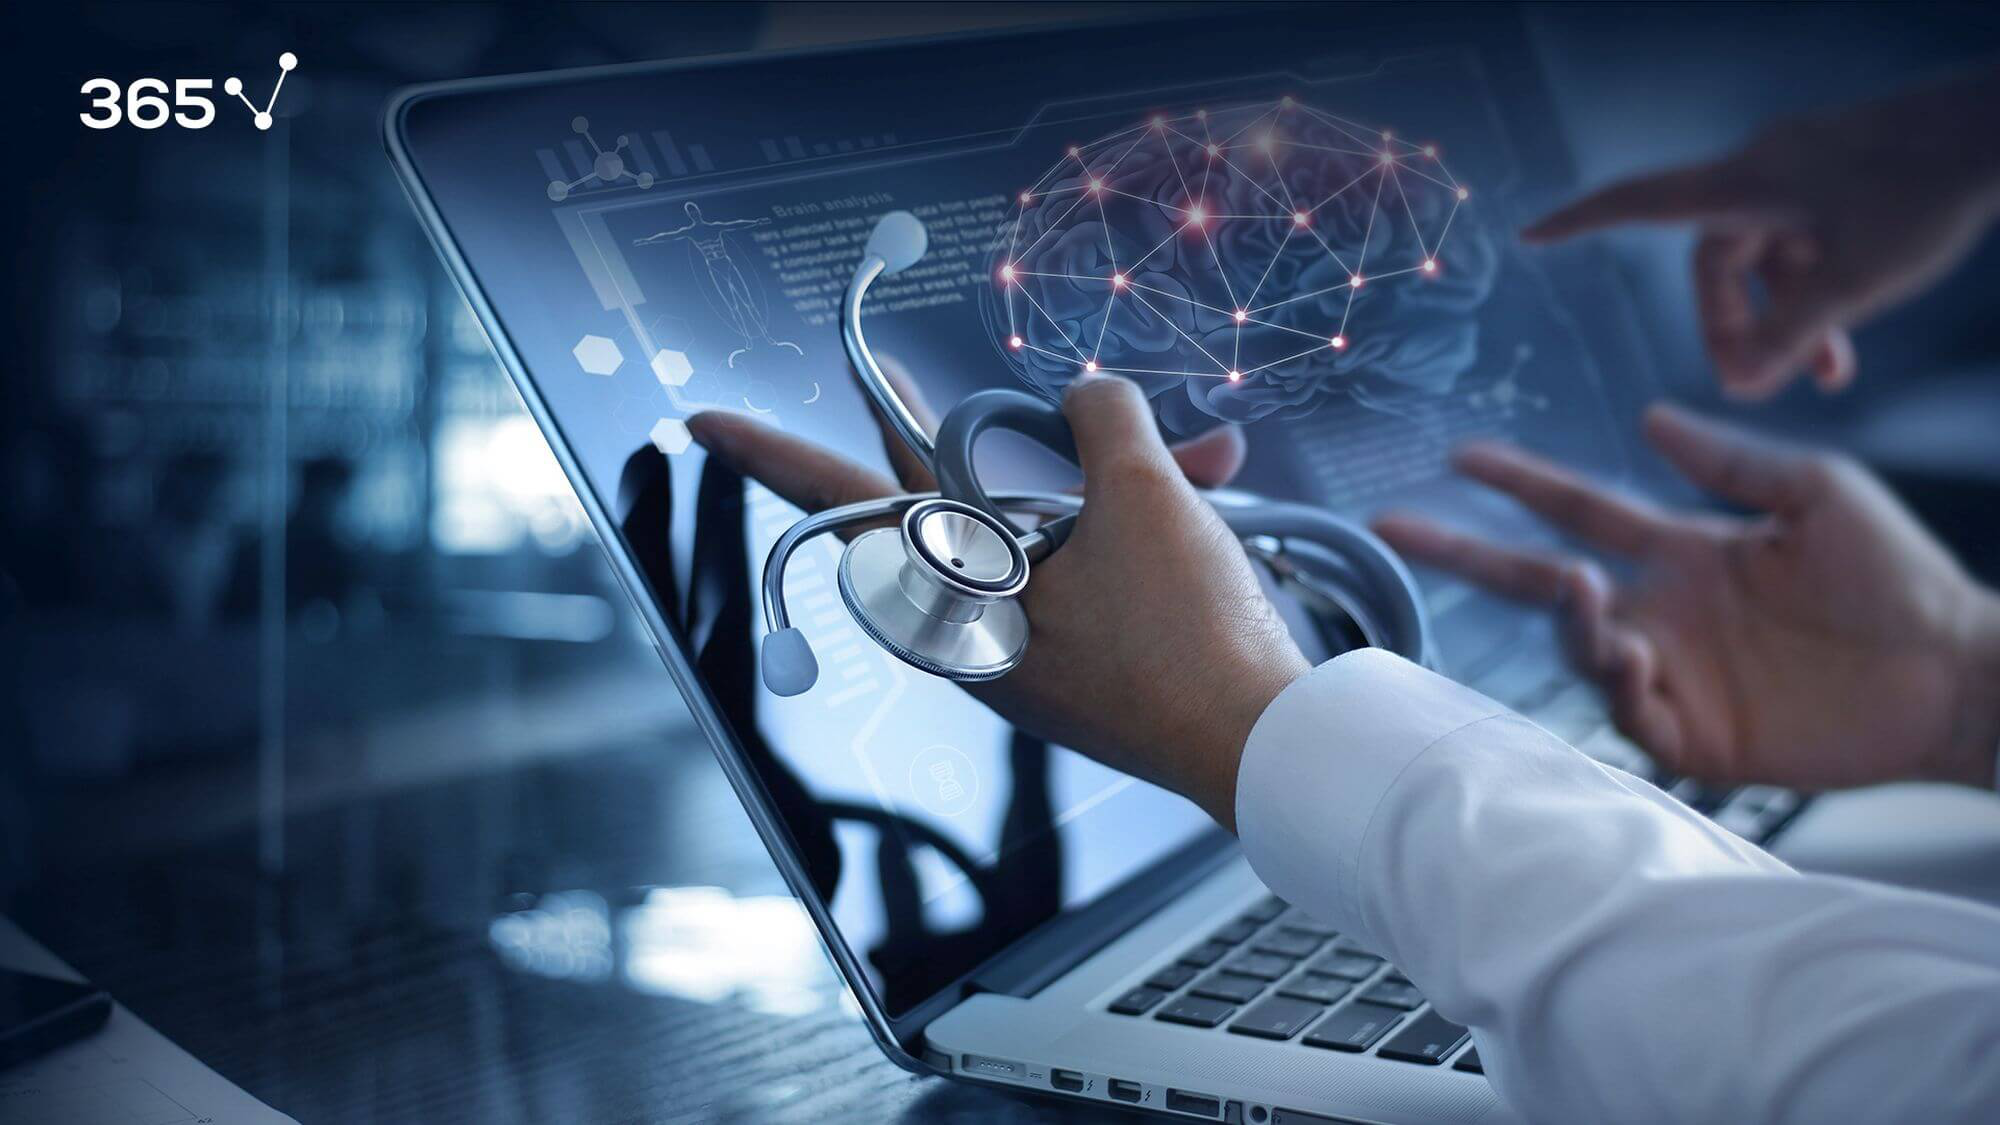

In [142]:
from PIL import Image
import IPython.display as display
img_path = "data-science-healthcare.jpg"
img = Image.open(img_path)
display.display(img)

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [144]:
#Load the dataset
data=pd.read_csv('c:/Users/PC/Documents/Practise/Healthcare/healthcare_dataset.csv')
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [145]:
#check data shape
# data contains 10000 rows and 15 columns
data.shape

(10000, 15)

In [146]:
#check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [147]:
#null values checking/ missing values
data.isna().sum()



Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [148]:
# check for duplicate values

checking_duplicate_values = data.duplicated().sum()
print(f' this data contains {checking_duplicate_values} duplicate values')

 this data contains 0 duplicate values


In [149]:
# checking for some statistical info
data.describe().style.background_gradient(cmap='RdYlBu')

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


Observations
1) The data contains 10000 rows and 15 columns
2) There is no null and duplicate values in the data
3) In the age column the min age is 18 year old and the max is 85 years old

Explore Data Analysis Process

Questions asked from the data
1) Create pie chart to represent the percentage distribution of each blood group in the dataset
2) Generate a bar graph to highlight the top 10 regular customers based on relevant criteria in the dataset 
3) Create pie charts to illustrate the percentage distribution of genders in the dataset
4) Generate a visualization ,possibly a histogram or another suitable chart, to present the distribution of age values in the dataset

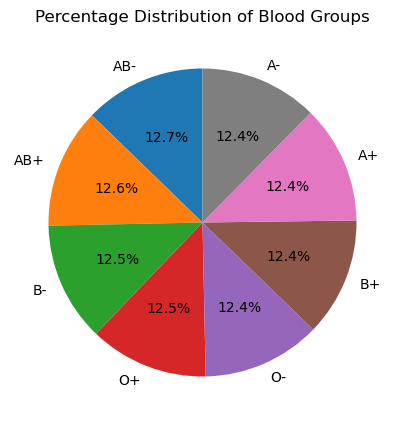

In [150]:
# checking the blood percentage in the data set
blood_group_counts = data['Blood Type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(blood_group_counts, labels=blood_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Blood Groups')
plt.show()

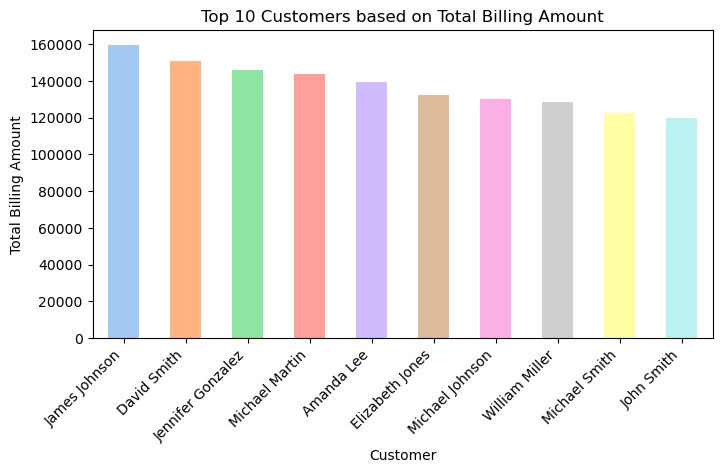

In [151]:
# checking the regular customers
# Group by customer and calculate the total billing amount for each customer
customer_totals = data.groupby('Name')['Billing Amount'].sum()

# Sort customers by total billing amount in descending order and select the top 10
top_10_customers = customer_totals.sort_values(ascending=False).head(10)

# Define a color palette
colors = sns.color_palette("pastel")

# Plotting the bar graph
plt.figure(figsize=(8, 4))
top_10_customers.plot(kind='bar', color=colors)
plt.title('Top 10 Customers based on Total Billing Amount')
plt.xlabel('Customer')
plt.ylabel('Total Billing Amount')
plt.xticks(rotation=45, ha='right')
plt.show()



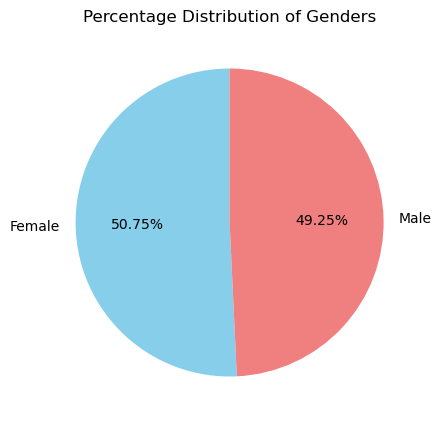

In [152]:
# Finding the gender percentage
gender_counts = data['Gender'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts,labels=gender_counts.index, autopct='%1.2f%%', startangle=90,colors=['skyblue', 'lightcoral'])
plt.title('Percentage Distribution of Genders')
plt.show()

Observations:
1) AB- Is the leading blood group in the dataset, followed by AB+
2) James Johson and David Smith have used more money at the hospital based on the billing amount paid
3) The female gender dominates the hospital

Again Other questions asked from the data
1) Generate chart to illustrate the medications used for various medical conditions in the dataset
2) Determine and visualize the day on which most patients are admitted using appropraite charts or graphs
3) identify and display the top 10 hospitals with the highest charges paid by patients
4) determine the doctor who earns the most and visualize the information
5) explore and analyze the the relationship between medical conditions and admission types, presenting the findings visually

In [153]:
#which medication used different medical conditions
data.groupby('Medical Condition')['Medication'].value_counts().sort_values(ascending=False).unstack().style.background_gradient(cmap='GnBu_r')


Medication,Aspirin,Ibuprofen,Lipitor,Paracetamol,Penicillin
Medical Condition,,,,,
Arthritis,322,320,318,324,366
Asthma,370,340,346,310,342
Cancer,291,352,350,346,364
Diabetes,335,301,326,327,334
Hypertension,328,335,356,323,346
Obesity,322,328,319,332,327


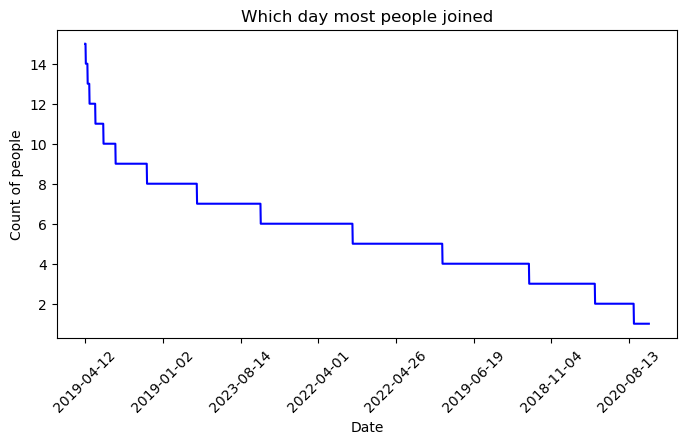

In [154]:
#find the which date most of the people joined
admission_counts = data['Date of Admission'].value_counts().sort_values(ascending=False)
# Plotting the bar graph
plt.figure(figsize=(8, 4))
admission_counts.plot(kind='line', color='blue')
plt.title('Which day most people joined')
plt.xlabel('Date')
plt.ylabel('Count of people')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

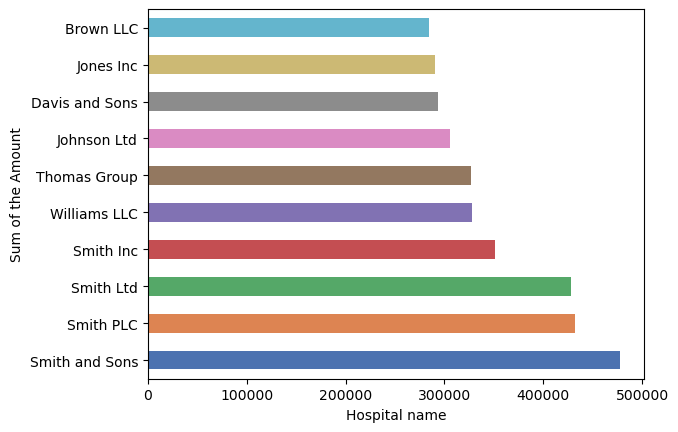

In [155]:
#the top 10 hospitals with the highest charges paid by patients
top_hospital=data.groupby('Hospital')['Billing Amount'].sum().sort_values(ascending=False).head(10)

colors = sns.color_palette("deep")

#plot the graph
plt.Figure(figsize=(8,4))
top_hospital.plot(kind='barh', color = colors)
plt.xlabel('Hospital name')
plt.ylabel('Sum of the Amount')
plt.show()


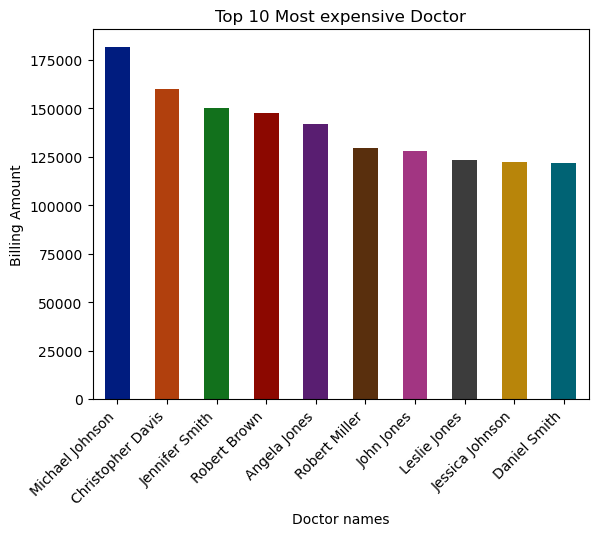

In [156]:
#find which doctor earns the most
top_earn = data.groupby('Doctor')['Billing Amount'].sum().sort_values(ascending=False).head(10)

colors = sns.color_palette('dark')

#plot the graph

plt.Figure(figsize=(8,4))
top_earn.plot(kind='bar', color = colors)
plt.xlabel('Doctor names')
plt.ylabel('Billing Amount')
plt.title('Top 10 Most expensive Doctor')
plt.xticks(rotation=45, ha='right')
plt.show()


In [157]:
# find the admission type awith different medical conditions
data.groupby('Medical Condition')['Admission Type'].value_counts().sort_values(ascending=False).unstack().style.background_gradient(cmap='Oranges')


Admission Type,Elective,Emergency,Urgent
Medical Condition,,,
Arthritis,569,529,552
Asthma,570,556,582
Cancer,555,578,570
Diabetes,528,557,538
Hypertension,515,578,595
Obesity,505,569,554


Observations:
1) For arthritis conditions, penicilin medication is used , while for asthma, aspirin is prescribed
2) On April 12, 2019 , most patients joined hospitals
3) Smith ands sons have paid more to the hospitals
4) Michael Janson is the highest-earning Doctor 

In [158]:
# the average amount  for the gender with billing amount
data.groupby('Gender')['Billing Amount'].mean().sort_values(ascending=False)



Gender
Male      25550.215933
Female    25484.385085
Name: Billing Amount, dtype: float64

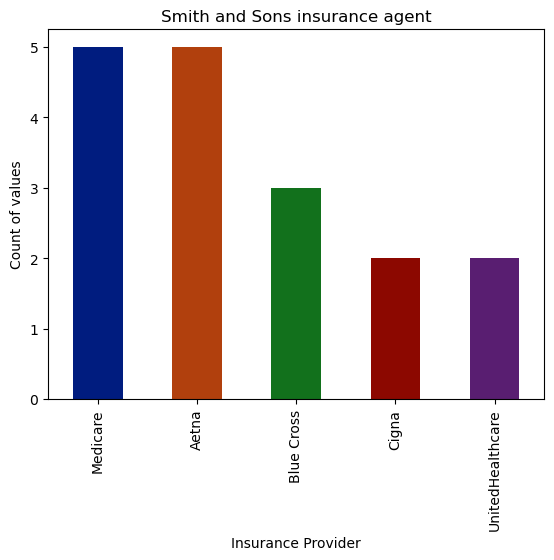

In [159]:
# find the smith and sons hospital insurance cover
insurance = data.groupby('Hospital')['Insurance Provider'].value_counts().loc['Smith and Sons']

colors = sns.color_palette('dark')


#plot graph
plt.Figure(figsize=(6,4))
plt.title('Smith and Sons insurance agent')
plt.xlabel('Insurance Agent')
plt.ylabel('Count of values')
insurance.plot(kind='bar',color=colors)
plt.show()


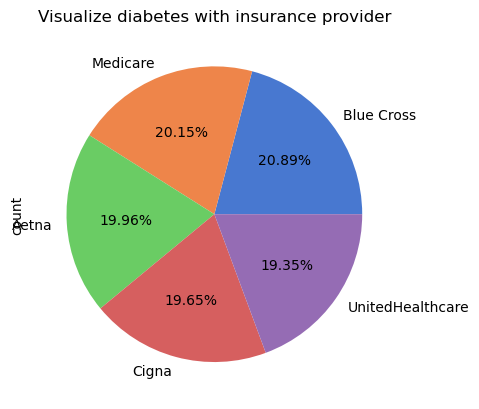

<Figure size 400x300 with 0 Axes>

In [160]:


# find which insurance are providing insurance for diabetes
diabetes = data[data['Medical Condition'] == 'Diabetes']['Insurance Provider'].value_counts()

colors = sns.color_palette('muted')
# plot the graph
diabetes.plot(kind='pie', colors=colors, labels=diabetes.index,autopct='%1.2f%%')
plt.title('Visualize diabetes with insurance provider')
plt.figure(figsize=(4,3))
plt.show()


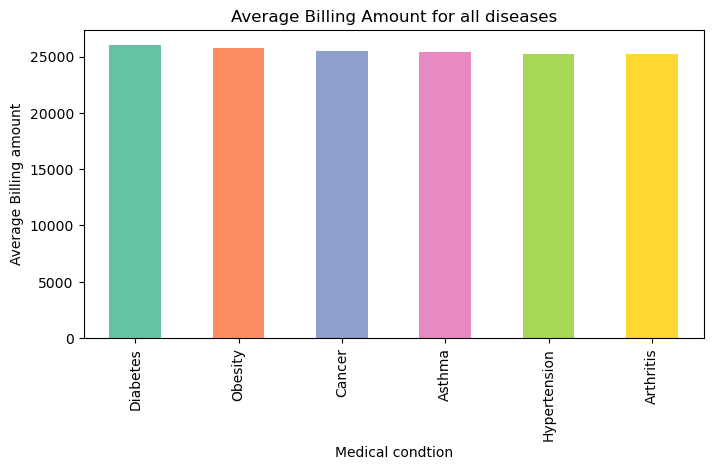

In [161]:
#find the average billing amount for each disease
disease = data.groupby('Medical Condition')['Billing Amount'].mean().sort_values(ascending=False)

colors=sns.color_palette('Set2')

#plot the graph
plt.figure(figsize=(8,4))
disease.plot(kind='bar',color=colors)
plt.xlabel('Medical condtion')
plt.ylabel('Average Billing amount')
plt.title('Average Billing Amount for all diseases')
plt.show()
